# Linear & Multiple Linear Regression with Statsmodels_OLS

In [1]:
#  linear regression model with OLS(Ordinary Least Squares) method by using statsmodels library.

#### The ordinary least squares (OLS) method is a linear regression technique that is used to estimate the unknown parameters in a model. The method relies on minimizing the sum of squared residuals between the actual and predicted values.

## Import Relevent Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Simple Linear Regression

In [3]:
simple_data = pd.read_csv('real_estate_price_size.csv')
simple_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
simple_data.shape

(100, 2)

In [5]:
simple_data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [7]:
# Dependent Variable is 'y' ie, price

y = simple_data['price']

# Independent variable ie 'x1' ie, size

x1 = simple_data['size']

In [9]:
# OLS requires the input to have a column of ones. We need to add this column manually.

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.13e-31
Time:                        12:29:12   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

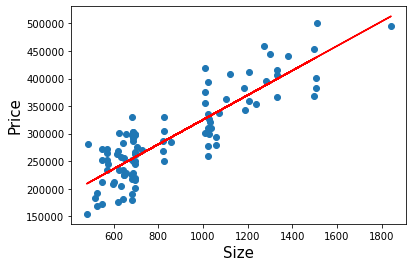

In [11]:
# Plotting the results with the regression line

plt.scatter(x1,y)
yhat = 101912.6 + 223.17*x1
fig = plt.plot(x1, yhat, c='red')
plt.xlabel('Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

## Multiple Linear Regression

In [12]:
multiple_data = pd.read_csv('real_estate_price_size_year_view.csv')
multiple_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [13]:
multiple_data.shape

(100, 4)

In [14]:
multiple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [16]:
multiple_data.describe(include = 'all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


In [17]:
# Creating dummy variables for view column

data = multiple_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [18]:
# Dependent Variable is 'y' ie, price

y = data['price']

# Independent variable ie 'x1' ie, size,year and view

x1 = data[['size','year','view']]

In [19]:
# OLS requires the input to have a column of ones. We need to add this column manually.

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.02e-50
Time:                        12:37:56   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Description of some of the terms in the table 

* R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that   is predictable/explained
* Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent       variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve   the model.
* F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines   the overall significance of the model.
* coef : the coefficients of the independent variables and the constant term in the equation.
* t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a   parameter, to the standard error

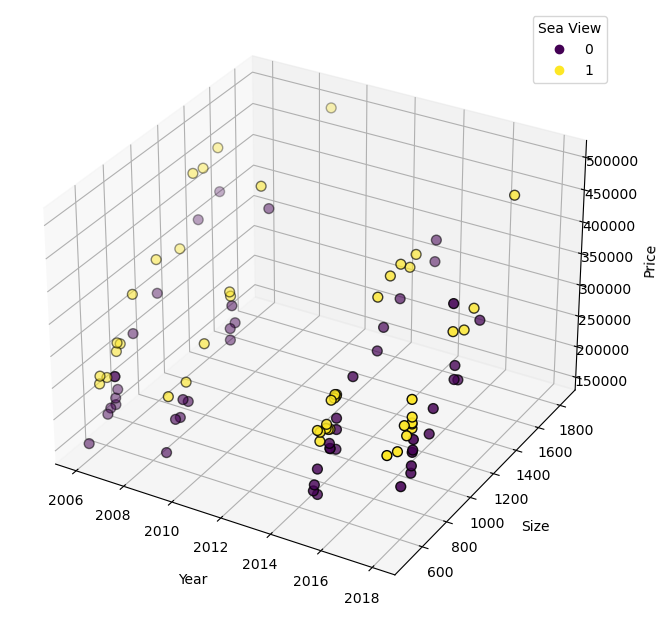

In [20]:
# Plotting the values
plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection='3d')
fig = ax.scatter3D(data['year'], data['size'],data['price'], s = 50, edgecolor = 'k', c = data['view'])

ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Size', labelpad=10)
ax.set_zlabel('Price', labelpad=10)

plt.legend(*fig.legend_elements(), title='Sea View');

## Comparing the Results


If we compare the Adjusted R-squared values:

                Linear Regression Adj. R^2          : 0.745
                Multiple Linear Regression Adj. R^2 : 0.913

We can see that adding 'year' and 'view' features did improved our regression formula as predicted.